# Keras Project

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report.Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

**Loading dataset and other imports.**

------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [4]:
data_file = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [5]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
data_file.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


# Data Preprocessing
-------
-------
**Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**

-----
**Check for any null values.**

------

<Axes: >

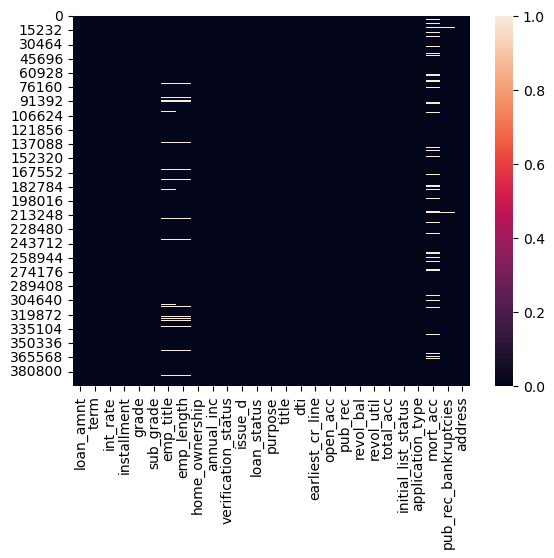

In [7]:
sns.heatmap(data_file.isnull())

In [8]:
feat_info("emp_title")
feat_info("emp_length")
feat_info("mort_acc")

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
Number of mortgage accounts.


**Percentage of null data.**

----

In [9]:
data_file.isnull().sum()/len(data_file)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

**We have quite large dataset.If data entries with null values make up only about max of 20% of original data, we can drop that data and focus on remaining data.**

-----

In [10]:
data_file.dropna(inplace=True)

<Axes: >

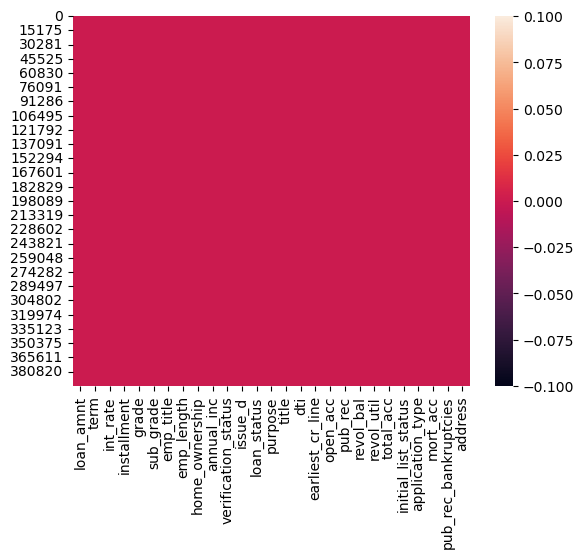

In [11]:
sns.heatmap(data_file.isnull())

In [12]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335867 entries, 0 to 396028
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             335867 non-null  float64
 1   term                  335867 non-null  object 
 2   int_rate              335867 non-null  float64
 3   installment           335867 non-null  float64
 4   grade                 335867 non-null  object 
 5   sub_grade             335867 non-null  object 
 6   emp_title             335867 non-null  object 
 7   emp_length            335867 non-null  object 
 8   home_ownership        335867 non-null  object 
 9   annual_inc            335867 non-null  float64
 10  verification_status   335867 non-null  object 
 11  issue_d               335867 non-null  object 
 12  loan_status           335867 non-null  object 
 13  purpose               335867 non-null  object 
 14  title                 335867 non-null  object 
 15  dti  

# Exploratory Data Analysis
----
----
**Get an understanding for which variables are important, view summary statistics, and visualize the data.**

----

**Create a column who had paid their loans back.**

-----

In [13]:
data_file['loan_repaid'] = data_file['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [14]:
data_file["loan_repaid"]

0         1
1         1
2         1
3         1
4         0
         ..
396024    1
396025    1
396026    1
396027    1
396028    1
Name: loan_repaid, Length: 335867, dtype: int64

<Axes: >

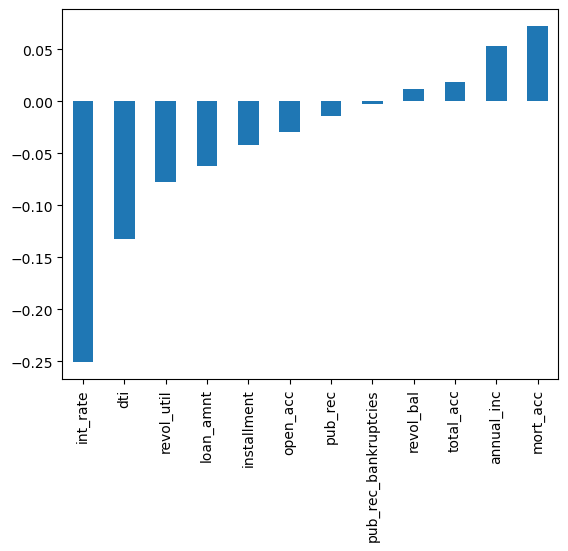

In [15]:
data_file.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

<Axes: xlabel='loan_amnt', ylabel='Count'>

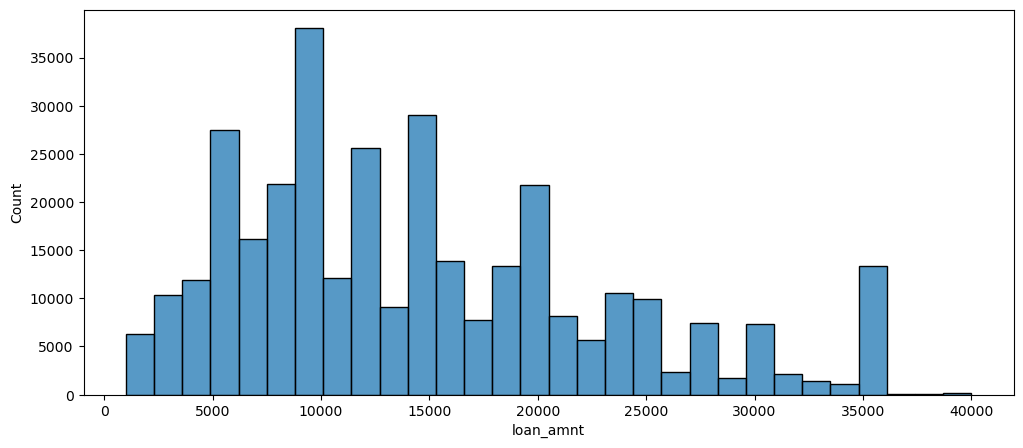

In [16]:
plt.figure(figsize=(12,5))
sns.histplot(data=data_file,x='loan_amnt',bins=30)

<Axes: xlabel='loan_amnt', ylabel='Count'>

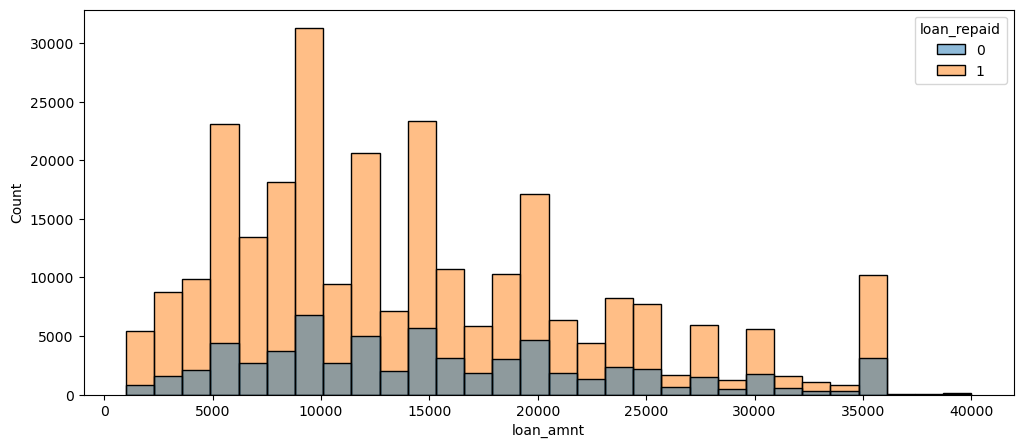

In [17]:
plt.figure(figsize=(12,5))
sns.histplot(data=data_file,x='loan_amnt',bins=30,hue="loan_repaid")

<Axes: xlabel='loan_repaid', ylabel='installment'>

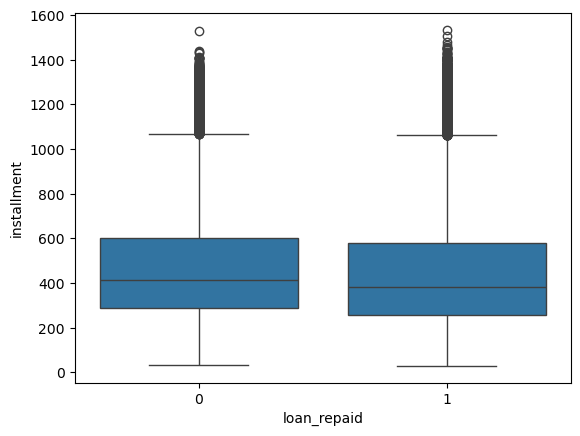

In [18]:
sns.boxplot(data=data_file,x='loan_repaid',y='installment')

<Axes: xlabel='grade', ylabel='count'>

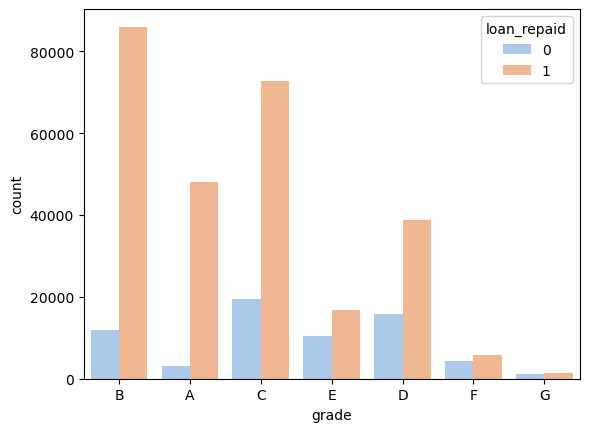

In [19]:
sns.countplot(data=data_file,x="grade",hue="loan_repaid",palette="pastel")

<Axes: xlabel='sub_grade', ylabel='count'>

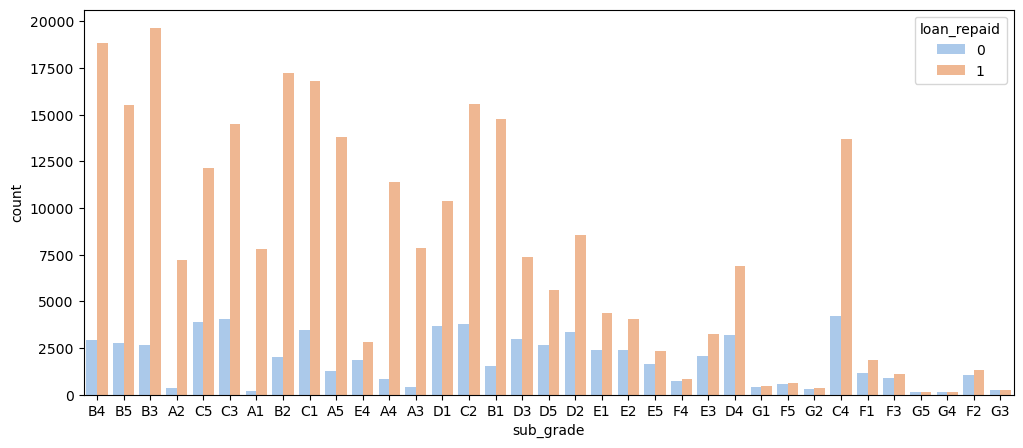

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(data=data_file,x="sub_grade",hue="loan_repaid",palette="pastel")

In [21]:
data_file['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

**Convert object into int.**

----

In [22]:
data_file['nterm']=data_file['term'].apply(lambda x:int(x[:3]))

In [23]:
data_file['nterm'].head()

0    36
1    36
2    36
3    36
4    60
Name: nterm, dtype: int64

In [24]:
data_file.drop('term',axis=1,inplace=True)

In [25]:
data_file['emp_title'].nunique()
feat_info("emp_title")

The job title supplied by the Borrower when applying for the loan.*


**There are too many job titles which won't help in building a good model.**

---

In [26]:
data_file.drop("emp_title",axis=1,inplace=True)

**Subgrade is more useful than grade.**

-----

In [27]:
data_file.drop("grade",axis=1,inplace=True)

In [28]:
data_file['loan_status'].nunique()

2

**We have already converted loan_status into integer.**

----

In [29]:
data_file.drop("loan_status",axis=1,inplace=True)

In [30]:
feat_info("emp_length")

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [31]:
sorted(data_file["emp_length"].unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [32]:
emp_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

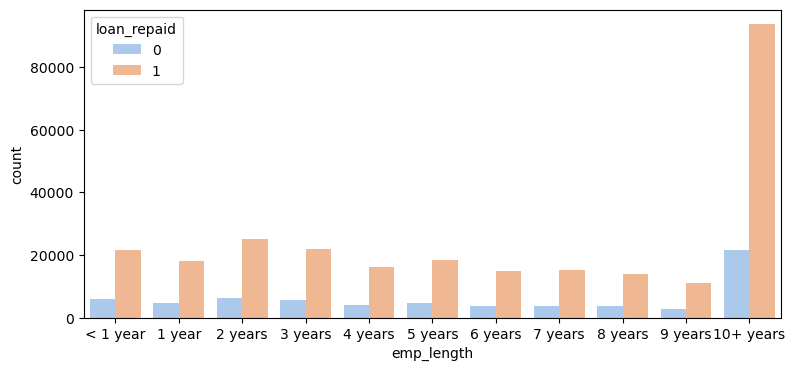

In [33]:
plt.figure(figsize=(9,4))
sns.countplot(data_file,x="emp_length",order=emp_order,palette="pastel",hue='loan_repaid')

In [34]:
emp_paid = data_file[data_file["loan_repaid"]==1].groupby("emp_length").count()["loan_repaid"]

In [35]:
emp_total = data_file.groupby("emp_length").count()["loan_repaid"]

<Axes: xlabel='emp_length', ylabel='loan_repaid'>

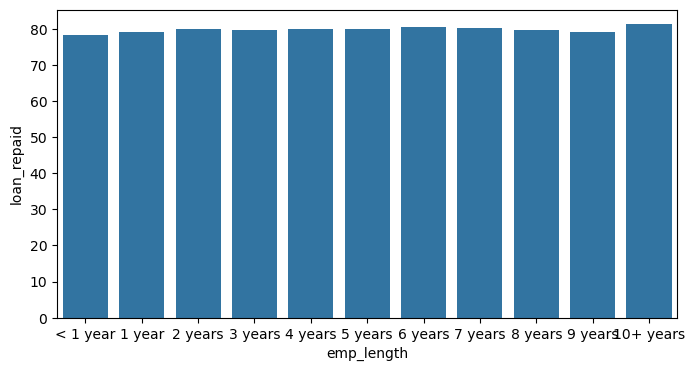

In [36]:
plt.figure(figsize=(8,4))
sns.barplot((emp_paid/emp_total)*100,order=emp_order)

**emp_length is not a good feature for our model as all values are similar which won't help to distinguish between loan repaid or not.**

----

In [37]:
data_file.drop("emp_length",axis=1,inplace=True)

In [38]:
data_file.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [39]:
data_file.title.head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [40]:
data_file.purpose.head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

**Purpose and title have similar meaning,so we can remove one of them.**


In [41]:
data_file.drop("title",axis=1,inplace=True)

In [42]:
feat_info("issue_d")

The month which the loan was funded


**issue_d will not contribute to make good model as it will leak our data by telling loan is already issued.**

In [43]:
data_file.drop("issue_d",axis=1,inplace=True)

**We can use pincode from address column to train our model but there can be many pincodes so ignore address column.** 

In [44]:
data_file.drop("address",axis=1,inplace=True)

In [45]:
data_file.select_dtypes(["object"]).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type'],
      dtype='object')

In [46]:
feat_info("earliest_cr_line")

The month the borrower's earliest reported credit line was opened


In [47]:
data_file.earliest_cr_line.head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [48]:
data_file["earliest_cr_line"] = data_file["earliest_cr_line"].apply(lambda x:int(x[-4:]))

In [49]:
data_file.earliest_cr_line.nunique()

65

In [50]:
data_file["earliest_cr_line"].corr(data_file["loan_repaid"])

-0.04585488536940443

**Now some features are objects,so we will convert them into dummies and concat with dataframe to use them.**

In [51]:
data_file.home_ownership.value_counts()

home_ownership
MORTGAGE    170831
RENT        133932
OWN          31045
OTHER           30
NONE            28
ANY              1
Name: count, dtype: int64

In [52]:
data_file['home_ownership']=data_file['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(data_file['home_ownership'],drop_first=True)
data_file = data_file.drop('home_ownership',axis=1)
data_file = pd.concat([data_file,dummies],axis=1)

In [53]:
dummies = pd.get_dummies(data_file[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
data_file = data_file.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
data_file = pd.concat([data_file,dummies],axis=1)

In [54]:
subgrade_dummies = pd.get_dummies(data_file['sub_grade'],drop_first=True)
data_file = pd.concat([data_file.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [55]:
data_file.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'nterm',
       'OTHER', 'OWN', 'RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [56]:
pd.set_option('display.max_columns', None) 
data_file.head()

,loan_amnt,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,nterm,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,36,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,8000.0,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,36,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,15600.0,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,36,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,7200.0,6.49,220.65,54000.0,2.60,2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,36,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,24375.0,17.27,609.33,55000.0,33.95,1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,60,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Creating the Model
----
----

**Now we have processed our data and can be used to train a model for predicting weather loan should be approved or not.**

----


In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.model_selection import train_test_split

In [58]:
X= data_file.drop("loan_repaid",axis=1).values
Y= data_file["loan_repaid"].values

**Spliting our data into training and testing.**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

**Normalizing data for training.**

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [62]:
X_train = scaler.fit_transform(X_train)

In [63]:
X_test = scaler.transform(X_test)

**Create model.**

In [125]:
model = Sequential()


model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')


In [126]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          batch_size=512,
          validation_data=(X_test, y_test), 
          )

Epoch 1/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.5133 - val_loss: 0.4602
Epoch 2/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.4639 - val_loss: 0.4582
Epoch 3/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.4589 - val_loss: 0.4566
Epoch 4/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.4585 - val_loss: 0.4559
Epoch 5/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.4539 - val_loss: 0.4558
Epoch 6/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.4547 - val_loss: 0.4545
Epoch 7/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.4534 - val_loss: 0.4540
Epoch 8/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.4508 - val_loss: 0.4537
Epoch 9/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.4527 - val_loss: 0.4532
Epoch 10/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.4523 - val_loss: 0.4536
Epoch 11/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.4517 - val_loss: 0.4532
Epoch 12/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms

In [127]:
losses = pd.DataFrame(model.history.history)

<Axes: >

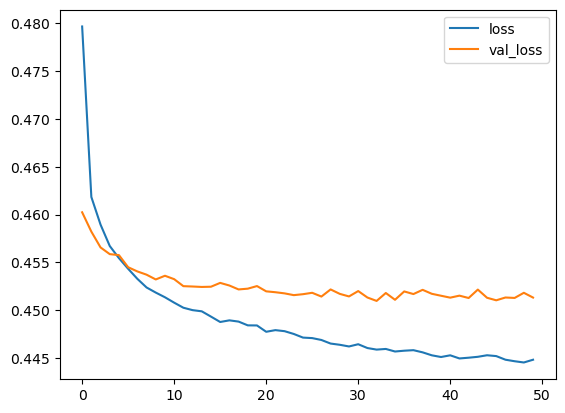

In [128]:
losses[["loss","val_loss"]].plot()

**Save Model.**

In [129]:
from tensorflow.keras.models import load_model

In [130]:
model.save('loan_prediction_project.h5')

In [131]:
from sklearn.metrics import classification_report,confusion_matrix

In [146]:
npredictions=model.predict(X_test)>0.5

2100/2100 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [148]:
npredictions=npredictions.astype("int")

In [149]:
print(classification_report(y_test,npredictions))

              precision    recall  f1-score   support

           0       0.55      0.09      0.16     13438
           1       0.81      0.98      0.89     53736

    accuracy                           0.80     67174
   macro avg       0.68      0.54      0.52     67174
weighted avg       0.76      0.80      0.74     67174



In [150]:
confusion_matrix(y_test,npredictions)

array([[ 1251, 12187],
       [ 1026, 52710]], dtype=int64)

In [156]:
import random
random_ind = random.randint(0,len(data_file))

new_customer = data_file.drop('loan_repaid',axis=1).iloc[random_ind]
